In [2]:
from math import log, e
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./../data/housing.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
df.isna().sum().loc[df.isna().sum() != 0][0]/df.size*100

0.1002906976744186

We can delet the 207 nun rows that do not contans the total_bedrooms informations since this number represent just $0.1\%$.

In [19]:
df.dropna(inplace=True)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

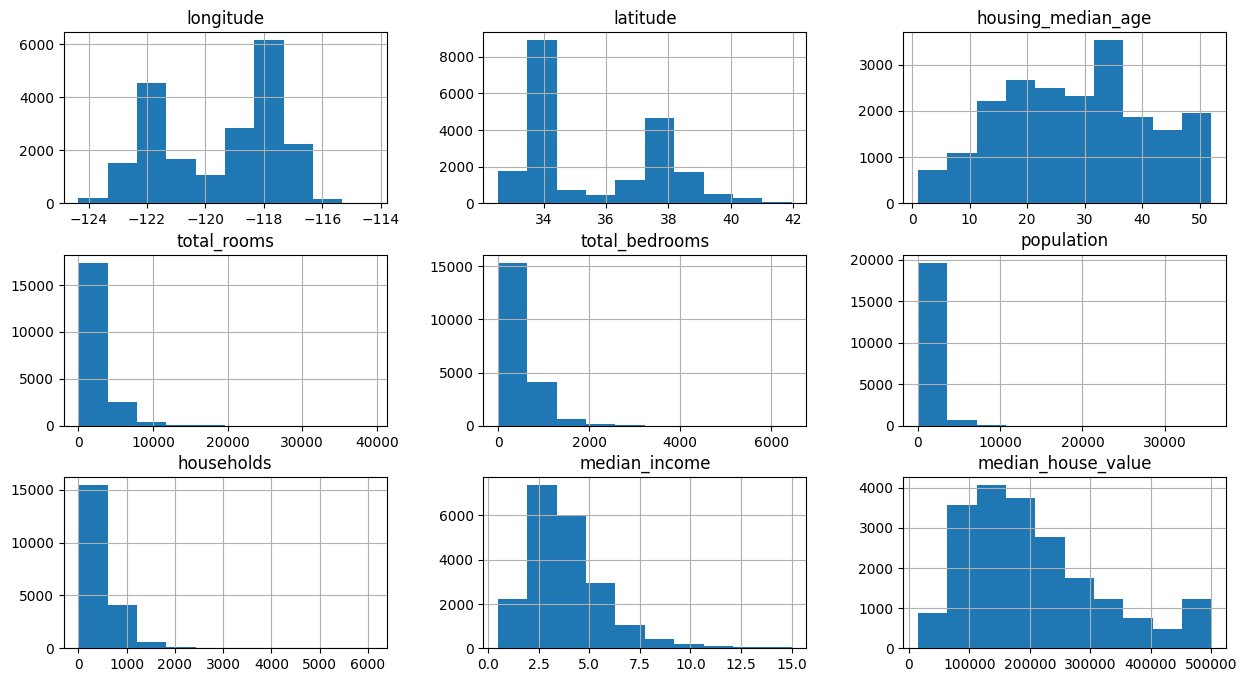

In [23]:
df.hist(figsize=(15, 8))

<AxesSubplot: >

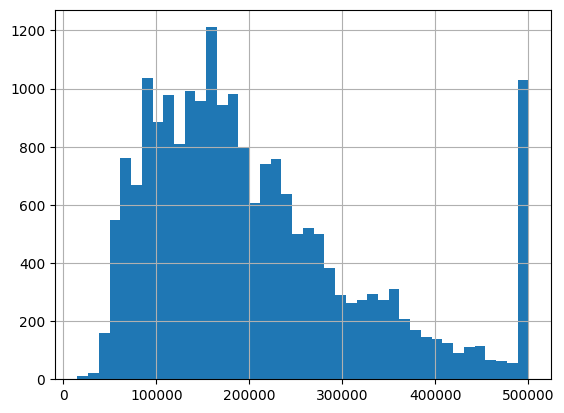

In [39]:
# Following the Sturge's rule convention
df.median_house_value.hist(bins=round(1+3.322*log(df.size)))

In [37]:
round(1+3.322*log(df.size))

42

In [41]:
df.corr()

/tmp/ipykernel_40137/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


/tmp/ipykernel_40137/963335083.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

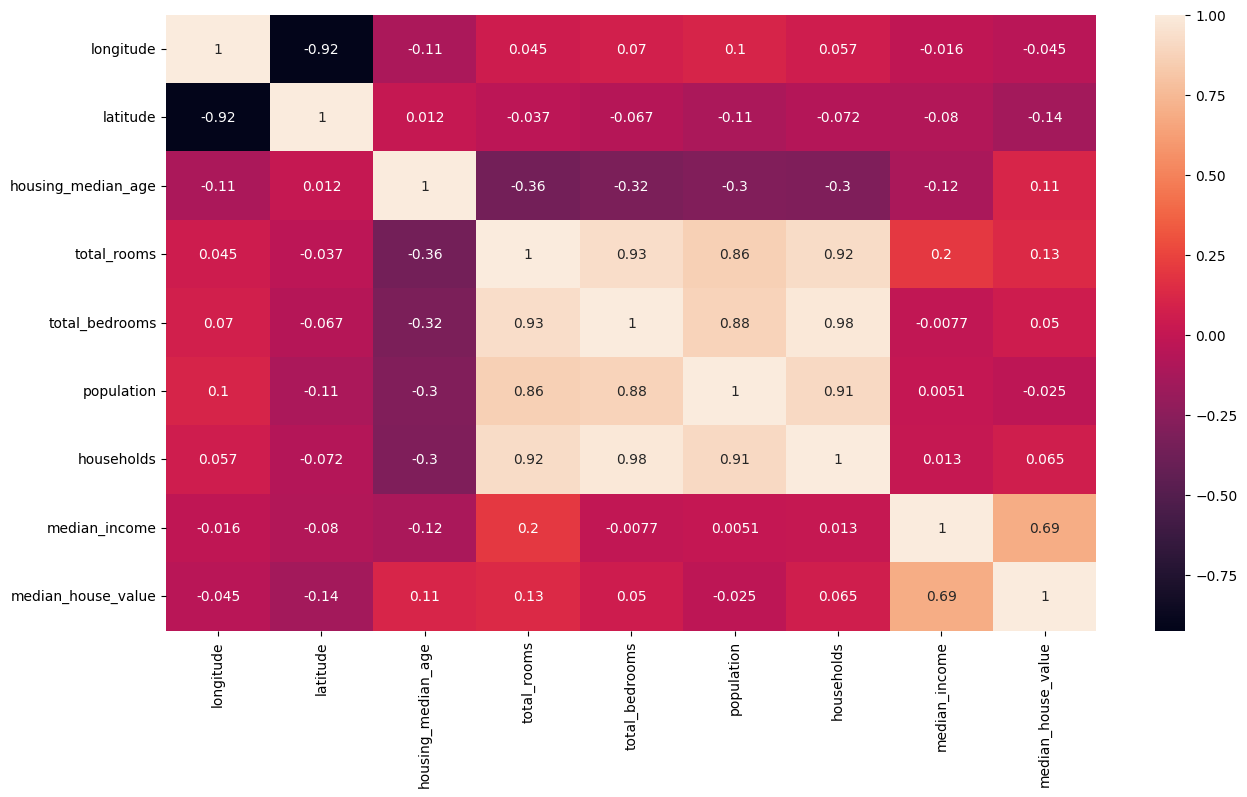

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

Before continuing we need to deal with the "ocean_proximity", and we will do this using the one-hot encoding 

In [46]:
pd.get_dummies(df.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [54]:
df = df.join(pd.get_dummies(df.ocean_proximity))

In [57]:
df.drop("ocean_proximity", axis=1, inplace=True)

In [58]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<AxesSubplot: >

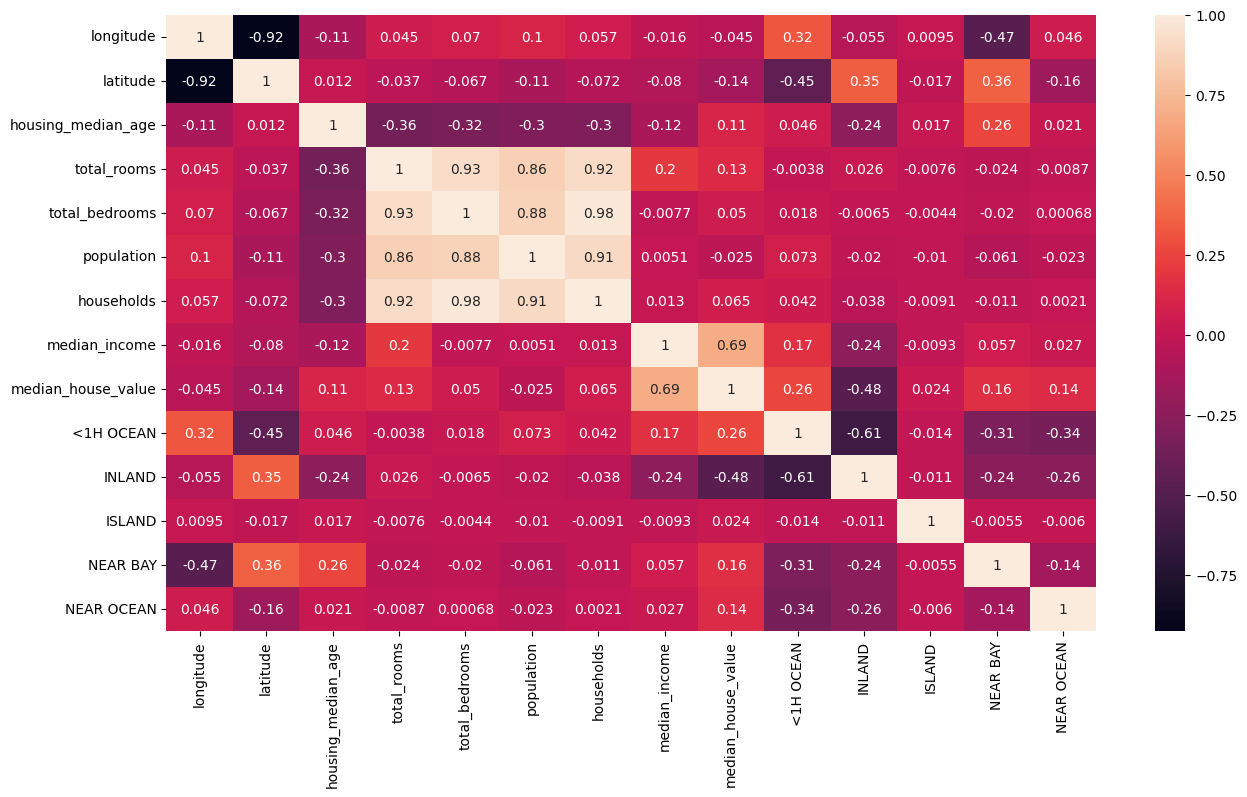

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [61]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("median_house_value", axis=1), df.median_house_value, test_size= 0.3, random_state=42)

In [71]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,0,1,0,0,0
7292,-118.22,33.98,34.0,2225.0,753.0,2980.0,736.0,1.6685,1,0,0,0,0
17618,-121.94,37.28,27.0,2859.0,464.0,1144.0,430.0,5.0822,1,0,0,0,0
17518,-121.91,37.34,35.0,2189.0,607.0,1193.0,562.0,2.8042,1,0,0,0,0
5172,-118.28,33.95,41.0,835.0,208.0,707.0,192.0,1.4103,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,1,0,0,0,0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,1,0,0,0,0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,1,0,0,0,0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,0,1,0


Creating the model

In [72]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [73]:
model.score(x_test, y_test)

0.653875373567343

In [75]:
model.coef_

array([-2.63895868e+04, -2.51155876e+04,  1.10371495e+03, -6.51854620e+00,
        1.05683950e+02, -3.52603701e+01,  3.87288500e+01,  3.92822347e+04,
       -3.02295329e+04, -7.01618666e+04,  1.63024846e+05, -3.57211867e+04,
       -2.69122595e+04])

In [74]:
model.intercept_

-2202935.7371625584

In [80]:
x_train.iloc[1,:][2]

34.0

In [81]:
first = [i for i in x_train.iloc[1,:]]

In [82]:
[-118.22,
 33.98,
 34.0,
 2225.0,
 753.0,
 2980.0,
 736.0,
 1.6685,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

[-118.22,
 33.98,
 34.0,
 2225.0,
 753.0,
 2980.0,
 736.0,
 1.6685,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [85]:
model.predict([first])

/home/mack/.asdf/installs/python/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([124757.5131945])